In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from newmwthods import *
from main import *

plt.rcParams['figure.figsize'] = [7.5, 4.5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

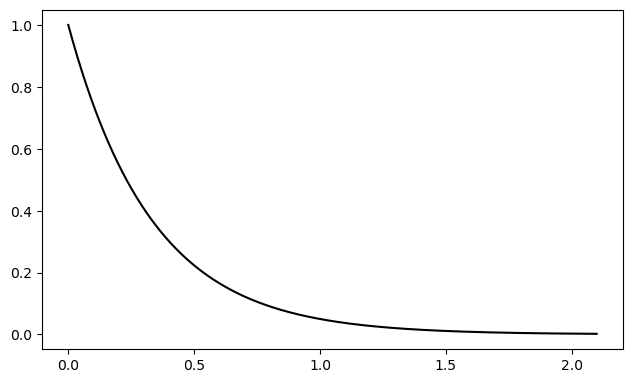

In [2]:
# начальное кол-во вещества
N0 = 1
# коэффициент распада
k = 3
# шаг
h = 0.1
n_steps = 20

draw_exact(N0, k, h, n_steps)

Made 2000 steps


S:\Anaconda\envs\tf-gpu\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


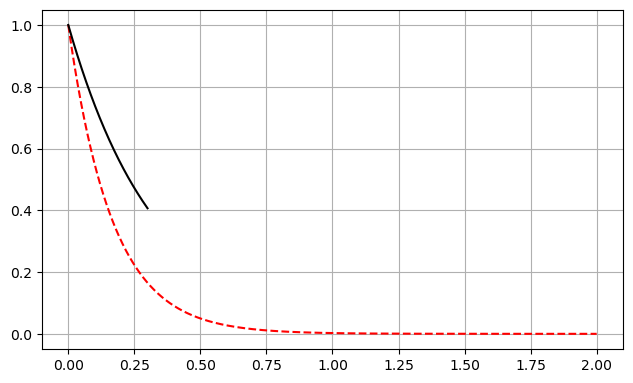

In [29]:
x, t = euler_backward(N0, 0, 2, 0.001, f, [k])
print(f'Made {len(t) - 1} steps')
plt.plot(t, x, 'r--')
draw_exact(N0, k, h, n_steps)

In [4]:
x[-1]

0.0024763539648335045

In [87]:
def rk45(x0, t0, t_end, h, func, context, trunc_zero=True):
#     atol = float(input('A_tol = '))
#     rtol = float(input('R_tol = '))
    atol = rtol = 10**(-10)
    x = x0
    t = t0
    x_history = [x]
    t_history = [t]
    true_error = [0]
    eval_error = [0]
    while t_history[-1] < t_end:
        new_f = lambda time: x*(np.e ** (-k * time))
        k1 = func(x, t, context)
        k2 = func(x + h * (k1 / 4), t + h / 4, context)
        k3 = func(x + h * (3 / 32 * k1 + 9 / 32 * k2), t + 3 / 8 * h, context)
        k4 = func(x + h * (1932 / 2197 * k1 - 7200 / 2197 * k2 + 7296 / 2197 * k3), t + 12 / 13 * h, context)
        k5 = func(x + h * (439 / 216 * k1 - 8 * k2 + 3680 / 513 * k3 - 845 / 4104 * k4), t + h, context)
        k6 = func(x + h * (-8 / 27 * k1 + 2 * k2 - 3544 / 2565 * k3 + 1859 / 4104 * k4 - 11 / 40 * k5), t + 0.5 * h,
                  context)
        # оценка ошибки 5 порядок
        x_hat = x + h * (16 / 135 * k1 + 6656 / 12825 * k3 + 28561 / 56430 * k4 - 9 / 50 * k5 + 2 / 55 * k6)
        # оценка метода 4 порядок
        xp = x + h * (25 / 216 * k1 + 1408 / 2565 * k3 + 2197 / 4104 * k4 - 0.2 * k5)
        tol = atol + np.max(np.abs([x_hat, xp])) * rtol
        err = np.sqrt((x_hat - xp) ** 2 / tol)
        # h_opt = h * (1 / err)**(1 / (min(p, p_hat) + 1)
        h = h * (1 / err) ** 0.2
        t += h
        x = xp
        true_error.append(x - new_f(t))
        eval_error.append(x_hat - x)
        x_history.append(x)
        t_history.append(t)
        if x_history[-1] < 0 and trunc_zero:
            x_history[-1] = 0
    return x_history, t_history, eval_error, true_error

In [3]:
x0 = N0
t0 = 0
t_end = 4
h = 0.1
k = 4

In [4]:
x, t, eval_error, true_error = rk45(x0, t0, t_end, h, f, [k])
print(f'Made {len(t) - 1} steps')
plt.plot(t, x, 'r')


plt.grid()

ValueError: not enough values to unpack (expected 4, got 2)

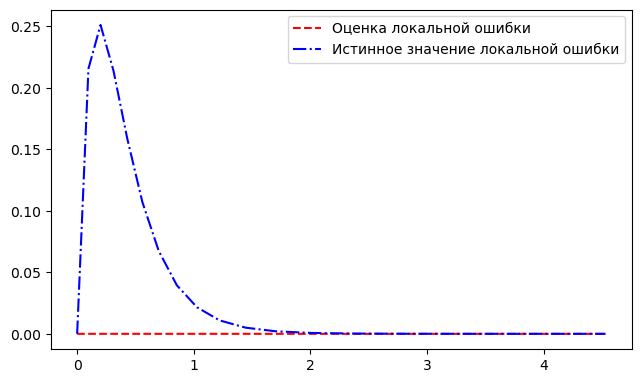

In [96]:
plt.plot(t, eval_error, 'r--')
plt.plot(t, true_error, 'b-.')
plt.legend(["Оценка локальной ошибки", "Истинное значение локальной ошибки"])

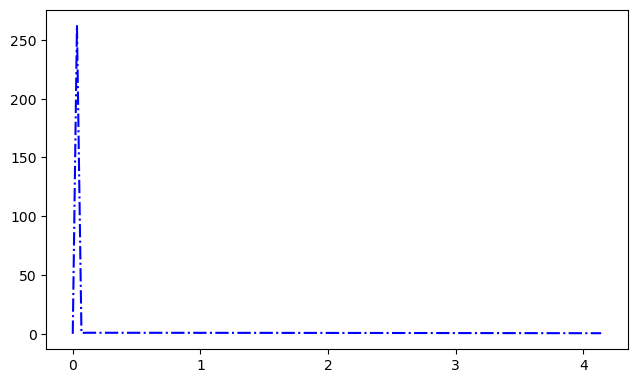

In [78]:
plt.plot(t, eval_error, 'b-.')

In [59]:
def dopri5(x0, t0, t_end, h, func, context, trunc_zero=True):
#     atol = float(input('A_tol = '))
#     rtol = float(input('R_tol = '))
    atol = rtol = 10**(-10)
    x = x0
    t = t0
    x_history = [x]
    t_history = [t]
    true_error = [0]
    eval_error = [0]
    while t_history[-1] < t_end:
        new_f = lambda time: x*(np.e ** (-k * time))
        k1 = func(x, t, context)
        k2 = func(x + h * (k1 / 5), t + h / 5, context)
        k3 = func(x + h * (3 / 40 * k1 + 9 / 40 * k2), t + 3 / 10 * h, context)
        k4 = func(x + h * (44/45 * k1 - 56/15 * k2 + 32/9 * k3), t + 4/5 * h, context)
        k5 = func(x + h * (19372/6561 * k1 - 25360/2187 * k2 + 64448/6561 * k3 - 212/729 * k4), t + 8/9 * h, context)
        k6 = func(x + h * (9017/3168 * k1 - 355/33 * k2 + 46732/5247 * k3 + 49/176 * k4 - 5103/18656 * k5), t + h,
                  context)
        xp = x + h * (35/384 * k1 + 500/1113 * k3 + 125/192 * k4 - 2187/6784 * k5 + 11/84 * k6)
        k7 = func(xp, t + h, context)
        
        x_hat = x + h * (5179/57600 * k1 + 7571/16695 * k3 + 393/640 * k4 - 92097/339200 * k5 + 187/2100 * k6 + 1/40 * k7)
        tol = atol + np.max(np.abs([x_hat, xp])) * rtol
        err = np.sqrt((x_hat - xp) ** 2 / tol)
        # h_opt = h * (1 / err)**(1 / (min(p, p_hat) + 1)
        h = h * (1 / err) ** 0.2
        t += h
        x = xp
        true_error.append(x - new_f(t))
        eval_error.append(err)
        x_history.append(x)
        t_history.append(t)
        if x_history[-1] < 0 and trunc_zero:
            x_history[-1] = 0
    return x_history, t_history, eval_error, true_error

Made 14 steps


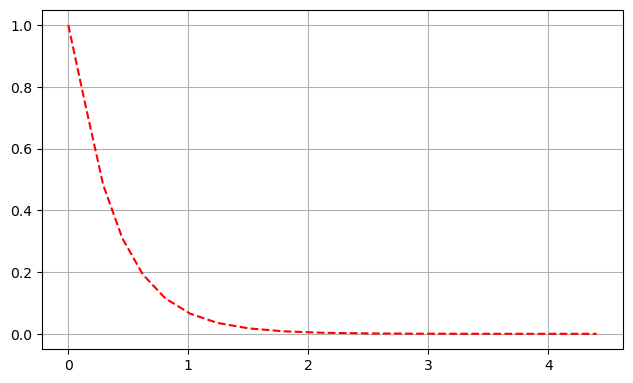

In [60]:
x, t, eval_error, true_error = dopri5(x0, t0, t_end, h, f, [k])
print(f'Made {len(t) - 1} steps')
plt.plot(t, x, 'r--')


plt.grid()

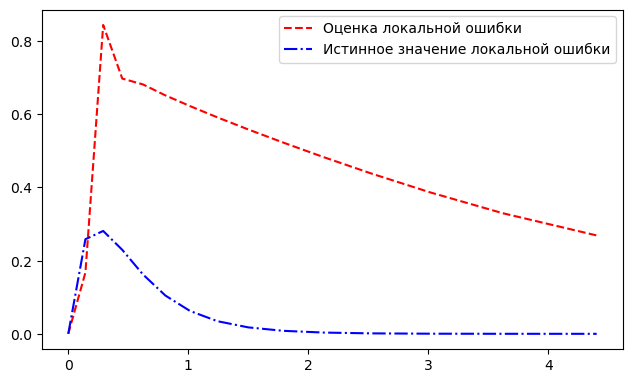

In [62]:
plt.plot(t, eval_error, 'r--')
plt.plot(t, true_error, 'b-.')
plt.legend(["Оценка локальной ошибки", "Истинное значение локальной ошибки"])

In [5]:
methods = [#euler_forward, 
           #euler_backward, 
           midpoint, 
           ralston2, 
           ralston3, 
           rk4,
           rkf5, 
           implicit_midpoint,
           adams_bashforth,
           adams_moulton]

In [6]:
x0 = 1
t0 = 0
t_end = 2
h = 0.01
k = 3

In [7]:
def relative_error(x, t):
    x_true = x0 * np.e ** (-k * np.asarray(t))
    diff = np.abs(np.asarray(x) - np.asarray(x_true)) / np.asarray(x_true)
    return diff

In [8]:
time_intervals = {}
for method in methods:
    current_t_end = t_end
    print(f'For method "{method.__name__}"')
    x, t = method(x0, t0, current_t_end, h, f, [k])
    while x[-1] > x0 * (10 ** (-12)):
        #print(f't_end = {current_t_end} | x[-1] = {x[-1]}')
        current_t_end += h
        x, t = method(x0, t0, current_t_end, h, f, [k], trunc_zero=False)
    print(f't_end = {current_t_end} | x[-1] = {x[-1]}')
    time_intervals[method.__name__] = current_t_end
    #print(f'Max error = {np.max(relative_error(x, t))}')
for method in time_intervals.keys():
    time_intervals[method] = round(time_intervals[method], 2)
print(time_intervals)

For method "midpoint"
t_end = 9.229999999999846 | x[-1] = 9.755680017513541e-13
For method "ralston2"
t_end = 9.229999999999846 | x[-1] = 9.755680017513537e-13
For method "ralston3"
t_end = 9.229999999999846 | x[-1] = 9.714060142111993e-13
For method "rk4"
t_end = 9.229999999999846 | x[-1] = 9.714371630091064e-13
For method "rkf5"
t_end = 9.229999999999846 | x[-1] = 9.714369764368176e-13
For method "implicit_midpoint"
t_end = 9.219999999999846 | x[-1] = 9.989491386717262e-13
For method "adams_bashforth"
t_end = 9.229999999999846 | x[-1] = 9.714449020582818e-13
For method "adams_moulton"
t_end = 9.229999999999846 | x[-1] = 9.714363925087128e-13
{'midpoint': 9.23, 'ralston2': 9.23, 'ralston3': 9.23, 'rk4': 9.23, 'rkf5': 9.23, 'implicit_midpoint': 9.22, 'adams_bashforth': 9.23, 'adams_moulton': 9.23}


In [9]:
f_call_count = 0


def f(x, t, context):
    k = context[0]
    global f_call_count
    f_call_count += 1
    return -k * x

In [10]:
global_err = [0] * len(methods)
i = 0
for method in methods:
    global f_call_count
    f_call_count = 0
    cur_h = h
    print(f'For method "{method.__name__}"')
    x, t = method(x0, t0, time_intervals[method.__name__], cur_h, f, [k])
    print(f'h = {cur_h} | err = {np.max(relative_error(x, t))}')
    while np.max(relative_error(x, t)) > 1e-9:
        cur_h *= 0.9
        x, t = method(x0, t0, time_intervals[method.__name__], cur_h, f, [k])
        print(f'h = {cur_h} | err = {np.max(relative_error(x, t))} | f_call = {f_call_count}')
        f_call_count = 0
    global_err[i] = (t, x)
    i += 1

For method "midpoint"
h = 0.01 | err = 0.0042571106848196235
h = 0.009000000000000001 | err = 0.0034372323454896236 | f_call = 3896
h = 0.008100000000000001 | err = 0.0027778775368437307 | f_call = 2278
h = 0.007290000000000001 | err = 0.0022461725687606313 | f_call = 2532
h = 0.006561000000000002 | err = 0.0018151638866371197 | f_call = 2812
h = 0.005904900000000002 | err = 0.0014685888781464805 | f_call = 3126
h = 0.005314410000000002 | err = 0.001187353591586598 | f_call = 3472
h = 0.004782969000000002 | err = 0.0009605528018701721 | f_call = 3858
h = 0.004304672100000002 | err = 0.00077738098878585 | f_call = 4288
h = 0.003874204890000002 | err = 0.000628963346011772 | f_call = 4764
h = 0.003486784401000002 | err = 0.0005090497829076443 | f_call = 5294
h = 0.003138105960900002 | err = 0.0004119712651128783 | f_call = 5882
h = 0.0028242953648100018 | err = 0.0003334706865672669 | f_call = 6536
h = 0.0025418658283290017 | err = 0.000269922762244548 | f_call = 7262
h = 0.0022876792454

Максимальная по модулю ошибка = 3.108175141708358e-07
Средняя ошибка = 5.2675794395699516e-08
Стандартное отклонение ошибки = 9.138474870144142e-08


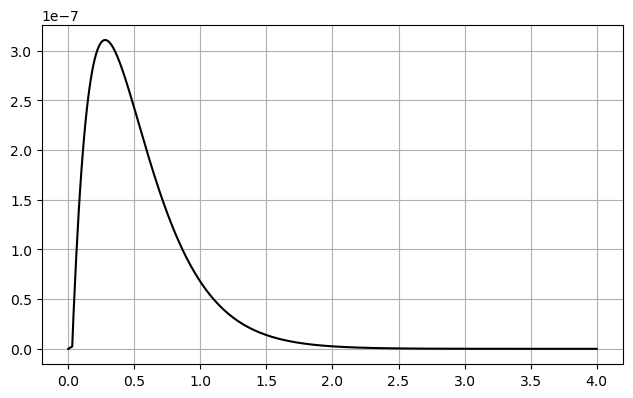

In [108]:
x, t = adams_bashforth(x0, t0, 4, 0.01, f, [k], trunc_zero=False)
plt.grid()
#plt.plot(t, x, 'r')
x_true = x0 * (np.e ** (-k * np.asarray(t)))
diff = x - x_true
print(f'Максимальная по модулю ошибка = {np.max(np.abs(diff))}')
print(f'Средняя ошибка = {np.mean(diff)}')
print(f'Стандартное отклонение ошибки = {np.std(diff)}')
plt.plot(t, diff, 'k')

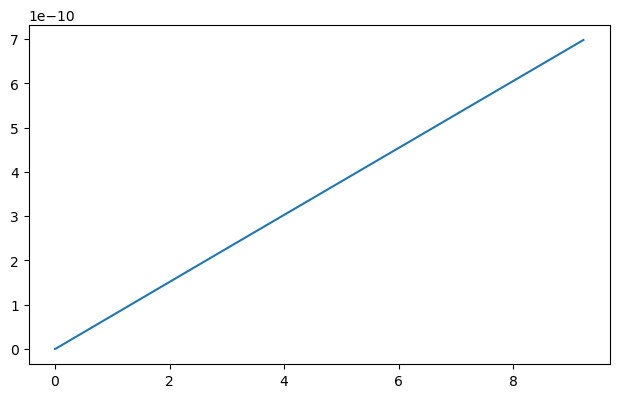

In [18]:
t, x = global_err[7]
plt.plot(t, relative_error(x, t))

In [109]:
x, t = adams_moulton(x0, t0, 4, 0.01, f, [k], trunc_zero=False)
#plt.plot(t, x, 'b--')
x_true = x0 * (np.e ** (-k * np.asarray(t)))
diff = x - x_true
print(f'\nМаксимальная по модулю ошибка = {np.max(np.abs(diff))}')
print(f'Средняя ошибка = {np.mean(diff)}')
print(f'Стандартное отклонение ошибки = {np.std(diff)}')
plt.plot(t, diff, 'k')
#plt.plot(t, x0 * (np.e ** (-k * np.asarray(t))), 'k')

In [21]:
global f_call_count
f_call_count = 0
x, t = rkf5(x0, t0, time_intervals["rkf5"], 0.01, f, [k])
print(f'h = {h} | err = {np.max(relative_error(x, t))} | f_call = {f_call_count}')


h = 0.01 | err = 6.259959511554584e-10 | f_call = 5538


| Название метода         | Размер шага           | Максимальная глобальная относительная ошибка | Число вызовов f |
|-------------------------|-----------------------|----------------------------------------------|-----------------|
| Средней точки           | 6.265787482177985e-06 | 7.382755307726155e-10                        | 2946158         |
| Ралстона (порядок 2)    | 6.265787482177985e-06 | 7.382762200603305e-10                        | 2946158         |
| Ралстона (порядок 3)    | 0.0003090315438263265 | 9.314367090373937e-10                        | 89601           |
| Рунге-Кутты (порядок 4) | 0.0025418658283290017 | 7.845919851416241e-10                        | 14524           |
| Рунге-Кутты-Фельберга   | 0.01                  | 6.259959511554584e-10                        | 5538            |
| Неявный средней точки   | 7.735540101454301e-06 | 6.420478652253962e-10                        | 5960448         |
| Адамса-Башфорта         | 0.0009847709021836122 | 7.410161352952914e-10                        | 37488           |
| Адамса-Мултона          | 0.0018530201888518425 | 6.982124819890579e-10                        | 29880           |


In [125]:
print(time_intervals)

NameError: name 'time_intervals' is not defined

In [49]:
def f(x, t, context):
    k = context[0]
    global f_call_count
    f_call_count += 1
    return -k * x

90
98


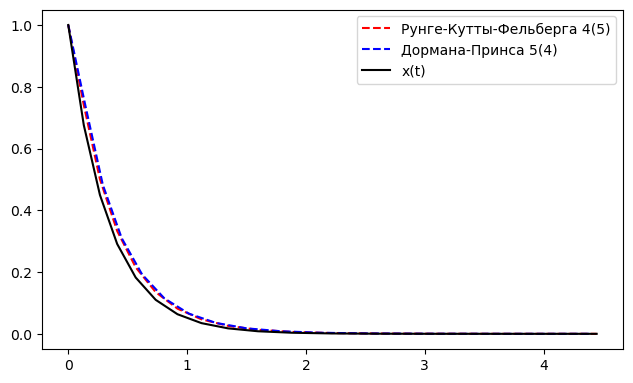

16 15


In [51]:
k = 3
f_call_count = 0
x, t,  = rk45(x0, 0, t_end, 0.1, f, [k])
print(f_call_count)
f_call_count = 0
x1, t1,  = dopri5(x0, 0, t_end, 0.1, f, [k])
print(f_call_count)
plt.plot(t, x, 'r--')
plt.plot(t1, x1, 'b--')
plt.plot(t, x0 * (np.e ** (-k * np.asarray(t))), 'k')
plt.legend(["Рунге-Кутты-Фельберга 4(5)", "Дормана-Принса 5(4)", "x(t)"])
plt.show()
print(len(t), len(t1))

In [37]:
x_true = x0 * (np.e ** (-k * np.asarray(t)))
diff = x - x_true
print(f'Максимальная по модулю ошибка = {np.max(np.abs(diff))}')
print(f'Средняя ошибка = {np.mean(diff)}')
print(f'Стандартное отклонение ошибки = {np.std(diff)}')

Максимальная по модулю ошибка = 0.06507841466185815
Средняя ошибка = 0.016509753861528375
Стандартное отклонение ошибки = 0.020224923699152367


In [42]:
x_true = x0 * (np.e ** (-k * np.asarray(t1)))
diff = x1 - x_true
print(f'Максимальная по модулю ошибка = {np.max(np.abs(diff))}')
print(f'Средняя ошибка = {np.mean(diff)}')
print(f'Стандартное отклонение ошибки = {np.std(diff)}')

Максимальная по модулю ошибка = 0.0895617775010279
Средняя ошибка = 0.02067979724038181
Стандартное отклонение ошибки = 0.02693961023771301


In [116]:
k=4
for h in [0.1, 0.01, 0.001]:
    f_call_count = 0
    x, t = adams_moulton(x0, 0, 2, h, f, [k])
    x_true = x0 * (np.e ** (-k * np.asarray(t)))
    diff = x - x_true
    print(f'\nМаксимальная по модулю ошибка = {np.max(np.abs(diff))}')
    print(f'Средняя ошибка = {np.mean(diff)}')
    print(f'Стандартное отклонение ошибки = {np.std(diff)}')
    print(f_call_count)


Максимальная по модулю ошибка = 0.00010778975179792649
Средняя ошибка = 7.426259636180766e-06
Стандартное отклонение ошибки = 3.912381449193407e-05
114

Максимальная по модулю ошибка = 2.18317466327278e-08
Средняя ошибка = -7.331367843798574e-09
Стандартное отклонение ошибки = 7.470089224039705e-09
1194

Максимальная по модулю ошибка = 2.453204306362977e-12
Средняя ошибка = -8.30864349353529e-13
Стандартное отклонение ошибки = 8.359559775909683e-13
11994


In [124]:
f_call_count = 0
k = 3
x, t,e,r  = dopri5(x0, 0, 4, 0.1, f, [k])
x_true = x0 * (np.e ** (-k * np.asarray(t)))
diff = x - x_true
print(f'Максимальная по модулю ошибка = {np.max(np.abs(diff))}')
print(f'Средняя ошибка = {np.mean(diff)}')
print(f'Стандартное отклонение ошибки = {np.std(diff)}')
print(len(t))
print(f_call_count)

Максимальная по модулю ошибка = 0.0895617775010279
Средняя ошибка = 0.02067979724038181
Стандартное отклонение ошибки = 0.02693961023771301
15
98
